In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# dataset = pd.read_csv(r"C:\Users\Akash\Desktop\electricity3\house_1_hourly.csv")

dataset = pd.read_csv(r"C:\Users\Akash\Desktop\electricity3\house_1_hourly.csv")

In [3]:
dataset.shape

(380755, 13)

In [4]:
dataset.head()

,timestamp,appliance,device_id,appliance_type,power_kwh,temperature,hour,dayofweek,day_name,is_weekend,is_holiday,month,tariff_rate
0,2012-11-16 11:00:00,laptop,4,electronics,0.018677,22.0,11,4,Friday,0,0,11,4.0
1,2012-11-16 12:00:00,laptop,4,electronics,0.021861,22.0,12,4,Friday,0,0,11,4.0
2,2012-11-16 13:00:00,laptop,4,electronics,0.018391,22.0,13,4,Friday,0,0,11,4.0
3,2012-11-16 14:00:00,laptop,4,electronics,0.023993,22.0,14,4,Friday,0,0,11,4.0
4,2012-11-16 15:00:00,laptop,4,electronics,0.024309,22.0,15,4,Friday,0,0,11,4.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380755 entries, 0 to 380754
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       380755 non-null  object 
 1   appliance       380755 non-null  object 
 2   device_id       380755 non-null  int64  
 3   appliance_type  380755 non-null  object 
 4   power_kwh       329118 non-null  float64
 5   temperature     380755 non-null  float64
 6   hour            380755 non-null  int64  
 7   dayofweek       380755 non-null  int64  
 8   day_name        380755 non-null  object 
 9   is_weekend      380755 non-null  int64  
 10  is_holiday      380755 non-null  int64  
 11  month           380755 non-null  int64  
 12  tariff_rate     380755 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 37.8+ MB


In [6]:
dataset.isnull().sum()

timestamp             0
appliance             0
device_id             0
appliance_type        0
power_kwh         51637
temperature           0
hour                  0
dayofweek             0
day_name              0
is_weekend            0
is_holiday            0
month                 0
tariff_rate           0
dtype: int64

In [7]:
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])

# Extract time feature
dataset['year'] = dataset['timestamp'].dt.year
dataset['month'] = dataset['timestamp'].dt.month
dataset['day'] = dataset['timestamp'].dt.day
dataset['dayofweek'] = dataset['timestamp'].dt.dayofweek

In [8]:
dataset = dataset.dropna(subset=['power_kwh'])

In [9]:
dataset.shape

(329118, 15)

In [10]:
dataset.drop_duplicates(inplace=True)

In [11]:
object_data = dataset.select_dtypes(include=['object'])
object_data

,appliance,appliance_type,day_name
0,laptop,electronics,Friday
1,laptop,electronics,Friday
2,laptop,electronics,Friday
3,laptop,electronics,Friday
4,laptop,electronics,Friday
...,...,...,...
380750,coffee_machine,kitchen_appliance,Sunday
380751,coffee_machine,kitchen_appliance,Sunday
380752,coffee_machine,kitchen_appliance,Sunday
380753,coffee_machine,kitchen_appliance,Sunday


In [12]:
# device_month = dataset.groupby(['device_id', 'month'])['power_kwh'].mean().unstack()

# plt.figure(figsize=(10, 6))
# sns.heatmap(device_month, cmap='YlGnBu', annot=True, fmt=".2f")
# plt.title("Average Power Usage by Device and Month")
# plt.ylabel("Device ID")
# plt.xlabel("Month")
# plt.tight_layout()
# plt.show()


In [13]:
dataset['appliance'].value_counts()

appliance
dishwasher           37985
tv                   37963
washing_machine      37722
fridge               37485
microwave            37485
kettle               37466
livingroom_s_lamp    35804
coffee_machine       33682
ipad_charger         23830
laptop                9696
Name: count, dtype: int64

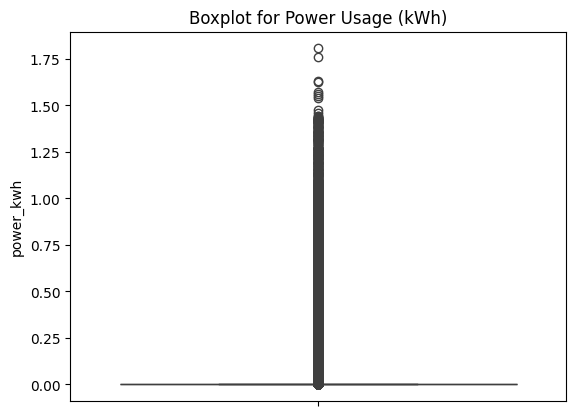

In [14]:
sns.boxplot(dataset['power_kwh'])
plt.title("Boxplot for Power Usage (kWh)")
plt.show()

In [15]:
# # Step 1: Calculate IQR
Q1 = dataset['power_kwh'].quantile(0.25)
Q3 = dataset['power_kwh'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out outliers
df_no_outliers = dataset[(dataset['power_kwh'] >= lower_bound) & (dataset['power_kwh'] <= upper_bound)]

print(f"Original rows: {len(dataset)}")

dataset = df_no_outliers



Original rows: 329118


In [16]:
dataset['appliance'].value_counts()

appliance
dishwasher           36311
washing_machine      34428
coffee_machine       33333
microwave            32326
tv                   31384
kettle               31256
livingroom_s_lamp    28502
ipad_charger         23515
laptop                2294
fridge                  82
Name: count, dtype: int64

In [17]:
# Drop fridge data
dataset = dataset[dataset['appliance'] != 'fridge']


In [18]:
dataset['appliance'].value_counts()

appliance
dishwasher           36311
washing_machine      34428
coffee_machine       33333
microwave            32326
tv                   31384
kettle               31256
livingroom_s_lamp    28502
ipad_charger         23515
laptop                2294
Name: count, dtype: int64

In [19]:
# Keep original for reference
dataset_1 = dataset.copy()

In [20]:
# Check if the columns exist before dropping
columns_to_drop = ['timestamp', 'appliance', 'appliance_type', 'day_name']
existing_columns = [col for col in columns_to_drop if col in dataset.columns]

# Drop only the existing columns
if existing_columns:
    dataset.drop(existing_columns, axis=1, inplace=True)
else:
    print(f"Columns {columns_to_drop} not found in the dataset.")


C:\Users\Akash\AppData\Local\Temp\ipykernel_7248\1774036146.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(existing_columns, axis=1, inplace=True)


In [21]:

# Proceed with feature and target separation
x = dataset.drop('power_kwh', axis=1)
y = dataset['power_kwh']

In [22]:
x.columns

Index(['device_id', 'temperature', 'hour', 'dayofweek', 'is_weekend',
       'is_holiday', 'month', 'tariff_rate', 'year', 'day'],
      dtype='object')

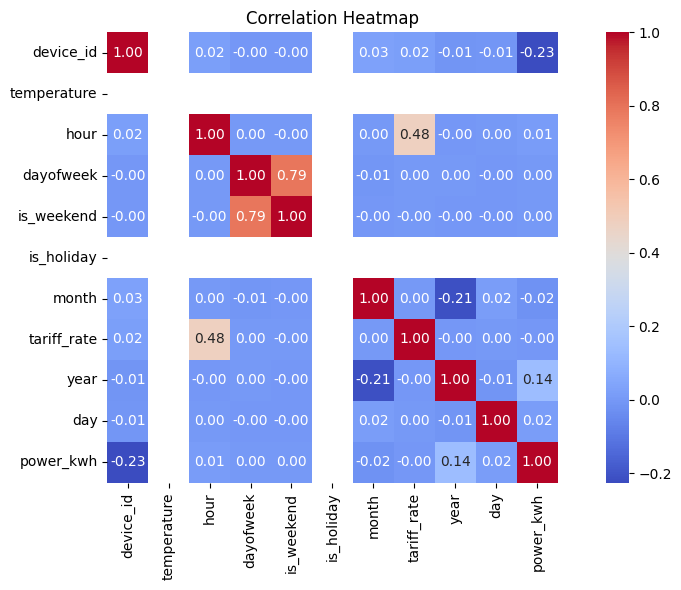

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine features and target
df_corr = x.copy()
df_corr['power_kwh'] = y  # Assuming y is your target

# Calculate correlation
corr = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [215]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)  # Use transform, not fit_transform!



In [219]:
x.head()

,device_id,temperature,hour,dayofweek,is_weekend,is_holiday,month,tariff_rate,year,day
154,4,22.0,21,3,0,0,11,6.0,2012,22
155,4,22.0,22,3,0,0,11,3.0,2012,22
156,4,22.0,23,3,0,0,11,3.0,2012,22
157,4,22.0,0,4,0,0,11,3.0,2012,23
158,4,22.0,1,4,0,0,11,3.0,2012,23


In [216]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Define and train the model
model_rs = XGBRegressor(
    subsample=0.8,
    n_estimators=300,
    max_depth=7,
    learning_rate=0.05,
    gamma=0,
    colsample_bytree=0.8,
    random_state=42
)

# 2. Fit the model
model_rs.fit(x_train, y_train)

# 3. Evaluate the model
y_pred = model_rs.predict(x_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 3.1838771468378225e-08
R² Score: 0.8417058203438402


In [217]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on training and testing sets
y_train_pred = model_rs.predict(x_train)
y_test_pred = model_rs.predict(x_test)

# Training scores
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Testing scores
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print("=== Training Data ===")
print("MSE:", train_mse)
print("R² Score:", train_r2)

print("\n=== Testing Data ===")
print("MSE:", test_mse)
print("R² Score:", test_r2)


=== Training Data ===
MSE: 3.080709387363321e-08
R² Score: 0.8472416542317962

=== Testing Data ===
MSE: 3.1838771468378225e-08
R² Score: 0.8417058203438402


In [218]:
# random value

model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(x_train, y_train)


# Predict on training and testing sets
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Training scores
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Testing scores
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print("=== Training Data ===")
print("MSE:", train_mse)
print("R² Score:", train_r2)

print("\n=== Testing Data ===")
print("MSE:", test_mse)
print("R² Score:", test_r2)


=== Training Data ===
MSE: 3.314610279737805e-08
R² Score: 0.8356435744066125

=== Testing Data ===
MSE: 3.4273300023578626e-08
R² Score: 0.8296019707691891
